# Lab 0 Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import random as rand
from math import ceil
from scipy.signal import argrelextrema
from astropy.table import Table, Column

## 4.1: Bias Frames

Create a pixel-wise median of the 0 C bias frames. Obtain the mean, median, mode, and stddev of the distribution and plot the histogram. A clip of the data was defined using the statistics found and the histogram was recalculated, as well as introducing the percentage of the data that was cut by the 5 sigma cutoff. 

Mean:  1003.89269829 
Median:  1004.0 
Mode:  1003.0 
Standard Deviation: 12.5039508319


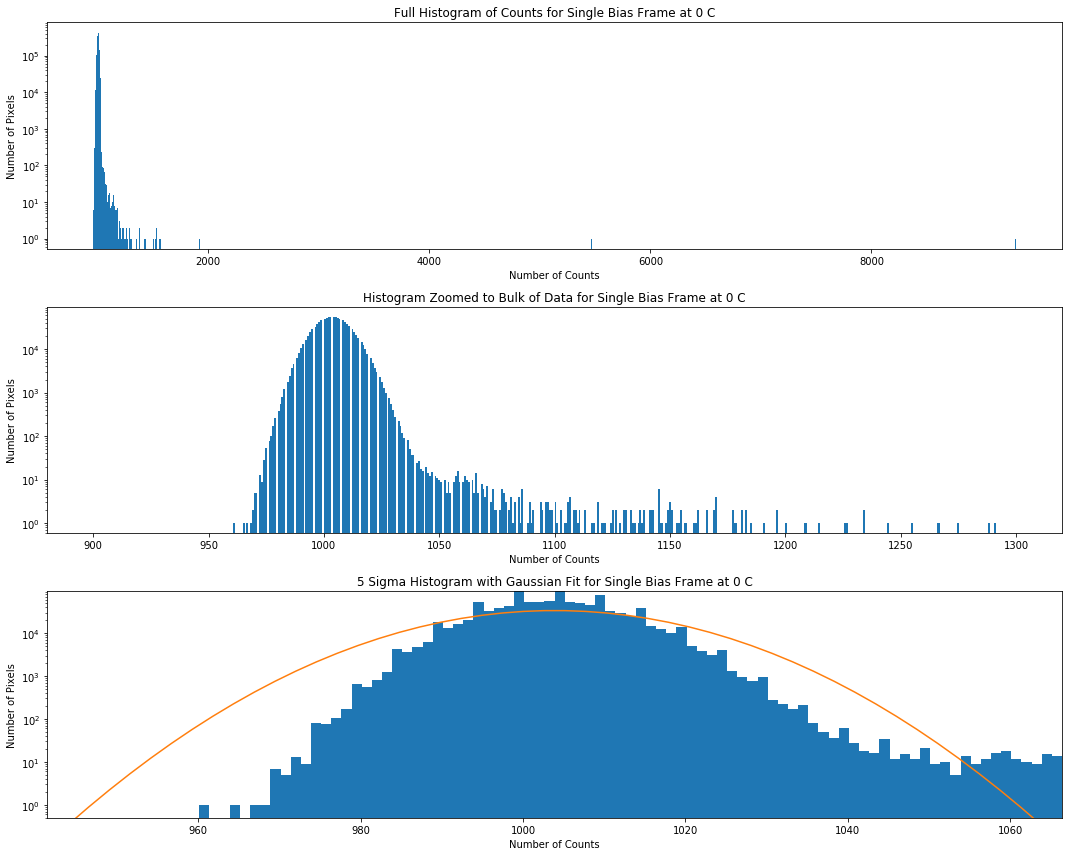

Percent Cut: 0.023%
Mean Electron Read Noise:  2068.01895847


In [40]:
# Importing data of 10 series of bias frames
data1, hdr1 = fits.getdata('../data/bias_series_0c.00000001.BIAS.FIT',0,header=True)
data2, hdr2 = fits.getdata('../data/bias_series_0c.00000002.BIAS.FIT',0,header=True)
data3, hdr3 = fits.getdata('../data/bias_series_0c.00000003.BIAS.FIT',0,header=True)
data4, hdr4 = fits.getdata('../data/bias_series_0c.00000004.BIAS.FIT',0,header=True)
data5, hdr5 = fits.getdata('../data/bias_series_0c.00000005.BIAS.FIT',0,header=True)
data6, hdr6 = fits.getdata('../data/bias_series_0c.00000006.BIAS.FIT',0,header=True)
data7, hdr7 = fits.getdata('../data/bias_series_0c.00000007.BIAS.FIT',0,header=True)
data8, hdr8 = fits.getdata('../data/bias_series_0c.00000008.BIAS.FIT',0,header=True)
data9, hdr9 = fits.getdata('../data/bias_series_0c.00000009.BIAS.FIT',0,header=True)
data10, hdr10 = fits.getdata('../data/bias_series_0c.00000010.BIAS.FIT',0,header=True)

# Determining the stats of the stats of one bias frame
mu = np.mean(data1)
sig = np.std(data1)
sig_1 = sig                                      # Save this for use later
mode = float(stats.mode(data1.flatten()).mode)
median = np.median(data1.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)

# Plot histogram of counts
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(data1.flatten(), bins=1000, log=True)
ax2.hist(data1.flatten(), bins=500, log=True, range=(900, 1300))

domain = np.linspace(mu-5*sig, mu+5*sig)
bias_gauss = np.exp(-pow((mu-domain)/sig, 2)/2)/np.sqrt(2*np.pi)/sig*len(data1.flatten())

ax3.hist([x for x in data1.flatten() if x < mu+5*sig], bins=100, range=(mu-5*sig, mu+5*sig), log=True)
ax3.plot(domain, bias_gauss)
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])

ax1.set_title('Full Histogram of Counts for Single Bias Frame at 0 C')
ax1.set_xlabel('Number of Counts')
ax1.set_ylabel('Number of Pixels')

ax2.set_title('Histogram Zoomed to Bulk of Data for Single Bias Frame at 0 C')
ax2.set_xlabel('Number of Counts')
ax2.set_ylabel('Number of Pixels')

ax3.set_title('5 Sigma Histogram with Gaussian Fit for Single Bias Frame at 0 C')
ax3.set_xlabel('Number of Counts')
ax3.set_ylabel('Number of Pixels')

fig.tight_layout()
plt.show()

# How many pixels were cut out?
print('Percent Cut: {0:3.3f}%'.format(100-len([x for x in data1.flatten() if x < mu+5*sig])/len(data1.flatten())*100))

gain = hdr1['EGAIN']
mean_electron = mu*gain
print('Mean Electron Read Noise: ', mean_electron)

Mean:  1000.41161861 
Median:  999.7 
Mode:  999.0 
Standard Deviation of 10: 7.08061756097
Single Frame StdDev / Sqrt(N_frames):  3.95409643796


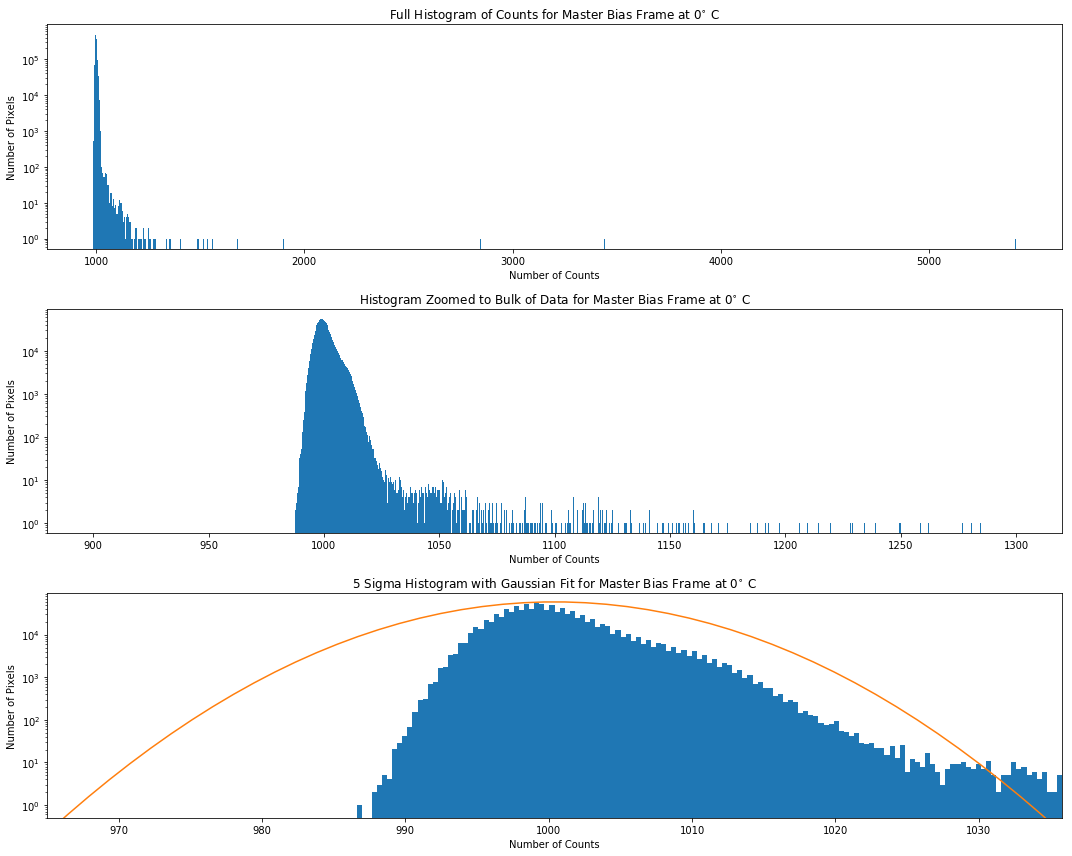

Percent Cut: 0.049%


In [3]:
# Taking the average of the 10 frames to make master_bias frame
master_bias = (data1 + data2 + data3 + data4 + data5 + data6 + data7 + data8 + data9 + data10)/10

# Determining the stats of the stats of the master_bias frame
mu = np.mean(master_bias)
sig = np.std(master_bias)
mode = float(stats.mode(master_bias.flatten()).mode)
median = np.median(master_bias.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation of 10:', sig)
print('Single Frame StdDev / Sqrt(N_frames): ', sig_1/np.sqrt(10))

# Plot histogram of counts
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(master_bias.flatten(), bins=1000, log=True)
ax2.hist(master_bias.flatten(), bins=1000, log=True, range=(900, 1300))

domain = np.linspace(mu-5*sig, mu+5*sig)
bias_gauss = np.exp(-pow((mu-domain)/sig, 2)/2)/np.sqrt(2*np.pi)/sig*len(master_bias.flatten())

ax3.hist([x for x in master_bias.flatten() if x < mu+5*sig], bins=200, range=(mu-5*sig, mu+5*sig), log=True)
ax3.plot(domain, bias_gauss)
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])

ax1.set_title(r'Full Histogram of Counts for Master Bias Frame at 0$^{\circ}$ C')
ax1.set_xlabel('Number of Counts')
ax1.set_ylabel('Number of Pixels')

ax2.set_title(r'Histogram Zoomed to Bulk of Data for Master Bias Frame at 0$^{\circ}$ C')
ax2.set_xlabel('Number of Counts')
ax2.set_ylabel('Number of Pixels')

ax3.set_title(r'5 Sigma Histogram with Gaussian Fit for Master Bias Frame at 0$^{\circ}$ C')
ax3.set_xlabel('Number of Counts')
ax3.set_ylabel('Number of Pixels')

fig.tight_layout()

plt.show()

print('Percent Cut: {0:3.3f}%'.format(100-len([x for x in master_bias.flatten() if x < mu+5*sig])
                                      /len(master_bias.flatten())*100))

Mean:  1027.99181175 
Median:  1028.0 
Mode:  1026.0 
Standard Deviation: 20.2668035912
Mean Err:  0.019791800382


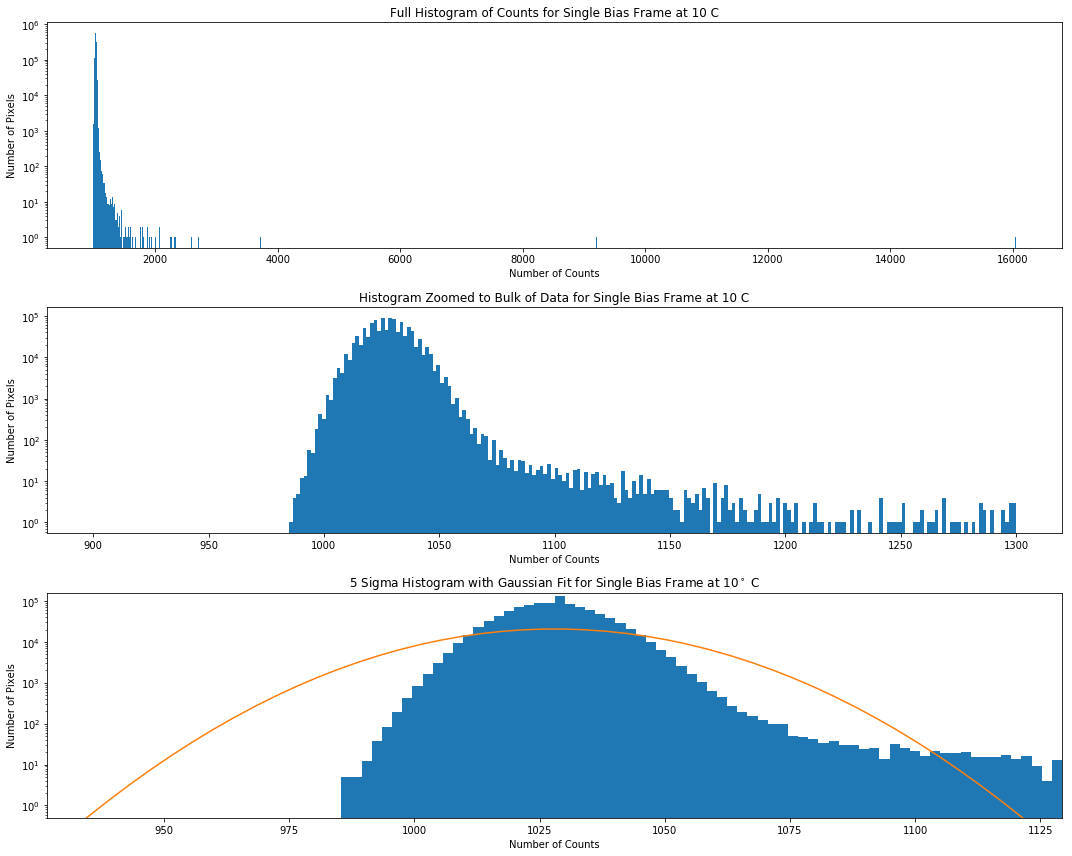

Percent Cut: 0.033%
Mean Electron Read Noise:  2117.66313221


In [28]:
# Open file
bias_10c, header_10c = fits.getdata('../data/bias_1series_10c_0s.00000001.BIAS.FIT', 0, header=True)

# Determining the stats of the stats of one bias frame
mu = np.mean(bias_10c)
sig = np.std(bias_10c)
mode = float(stats.mode(bias_10c.flatten()).mode)
median = np.median(bias_10c.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)
print('Mean Err: ', sig/1024)

# Plot histogram of counts
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.hist(bias_10c.flatten(), bins=1000, log=True)
ax2.hist(bias_10c.flatten(), bins=250, log=True, range=(900, 1300))

domain = np.linspace(mu-5*sig, mu+5*sig)
bias_gauss = np.exp(-pow((mu-domain)/sig, 2)/2)/np.sqrt(2*np.pi)/sig*len(data1.flatten())

ax3.hist([x for x in bias_10c.flatten() if x < mu+5*sig], bins=100, range=(mu-5*sig, mu+5*sig), log=True)
ax3.plot(domain, bias_gauss)
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])

ax1.set_title('Full Histogram of Counts for Single Bias Frame at 10 C')
ax1.set_xlabel('Number of Counts')
ax1.set_ylabel('Number of Pixels')

ax2.set_title('Histogram Zoomed to Bulk of Data for Single Bias Frame at 10 C')
ax2.set_xlabel('Number of Counts')
ax2.set_ylabel('Number of Pixels')

ax3.set_title(r'5 Sigma Histogram with Gaussian Fit for Single Bias Frame at 10$^\circ$ C')
ax3.set_xlabel('Number of Counts')
ax3.set_ylabel('Number of Pixels')

fig.tight_layout()
plt.show()

# How many pixels were cut out?
print('Percent Cut: {0:3.3f}%'.format(100-len([x for x in bias_10c.flatten() if x < mu+5*sig])/
                                      len(bias_10c.flatten())*100))

gain = header_10c['EGAIN']
mean_electron = mu*gain
print('Mean Electron Read Noise: ', mean_electron)

## 4.2: Dark Frames

Just like for the bias frames, the median of the same temperature and exposure time dark frames was calcuclated, as well as the same four statistics. An identical 5 sigma cutoff was used to clip and recalculate the mean, median, mode, and stddev. The pixels that fell outside of this cutoff to the higher edge are those that are marked as being "hot" pixels, since they detect a signal when there should not be any. 

In [5]:
# Open all the files and stick them in a list to loop over
dark1 = fits.open('../data/dark_10series_0c_0m30s.00000001.DARK.FIT')
dark2 = fits.open('../data/dark_10series_0c_0m30s.00000002.DARK.FIT')
dark3 = fits.open('../data/dark_10series_0c_0m30s.00000003.DARK.FIT')
dark4 = fits.open('../data/dark_10series_0c_0m30s.00000004.DARK.FIT')
dark5 = fits.open('../data/dark_10series_0c_0m30s.00000005.DARK.FIT')
dark6 = fits.open('../data/dark_10series_0c_0m30s.00000006.DARK.FIT')
dark7 = fits.open('../data/dark_10series_0c_0m30s.00000007.DARK.FIT')
dark8 = fits.open('../data/dark_10series_0c_0m30s.00000008.DARK.FIT')
dark9 = fits.open('../data/dark_10series_0c_0m30s.00000009.DARK.FIT')
dark10 = fits.open('../data/dark_10series_0c_0m30s.00000010.DARK.FIT')
dark_list = [dark1[0].data, dark2[0].data, dark3[0].data, dark4[0].data, dark5[0].data, 
             dark6[0].data, dark7[0].data, dark8[0].data, dark9[0].data, dark10[0].data]

# Make master median dark frame
master_dark = np.zeros(shape=dark1[0].shape)     # Blank array with same shape as others
for i in range(1024):                            # Index over one axis
    for j in range(1024):                        # Index over the other
        indices_list = []                        # Make a list of the values in the i,j pixel
        for dark in dark_list:
            indices_list.append(dark[i][j])
        master_dark[i][j] = np.median(indices_list) # Add the median value for the i,j pixel 
                                                    #   to master dark at the right location

# Close all the files
dark1.close()
dark2.close()
dark3.close()
dark4.close()
dark5.close()
dark6.close()
dark7.close()
dark8.close()
dark9.close()
dark10.close()

Range of count values:  1002.0  to  62865.0
Mean:  1025.4666481 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 155.561649517
Mean Err:  0.151915673356


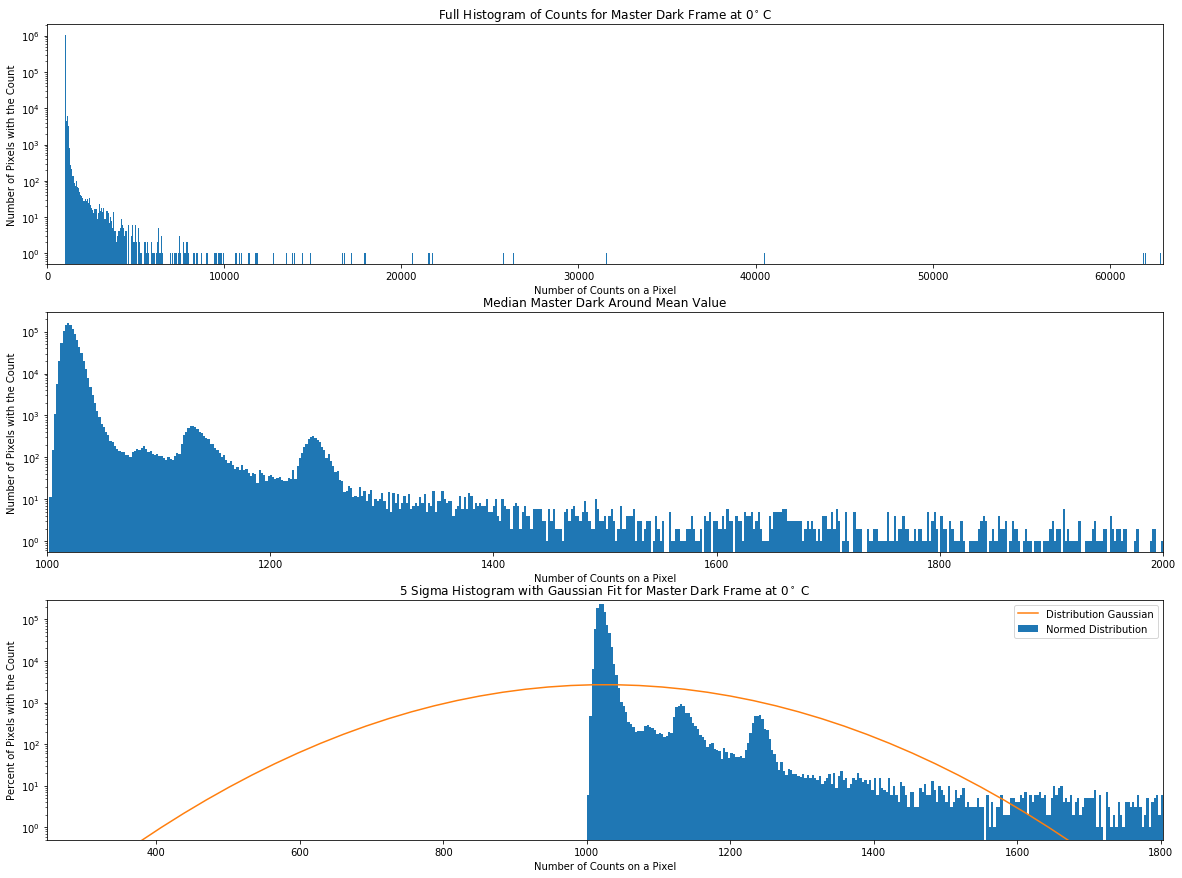

In [34]:
print('Range of count values: ', master_dark.min(), ' to ', master_dark.max())

# Find statistics of master dark
mu = np.mean(master_dark.flatten())
median = np.median(master_dark.flatten())
mode = float(stats.mode(master_dark.flatten()).mode)
sig = np.std(master_dark.flatten())
print('Mean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)
print('Mean Err: ', sig/1024)

# Plot Histograms
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.hist(master_dark.flatten(), bins=1000, log=True)
ax2.hist(master_dark.flatten(), bins=501, log=True, range=(1000, 2000))
ax3.hist(master_dark.flatten(), bins=300,
         log=True, range=(1000, 2000), label='Normed Distribution')

ax1.set_xlim(0, 63000)
ax2.set_xlim(1000, 2000)

ax1.set_title(r'Full Histogram of Counts for Master Dark Frame at 0$^{\circ}$ C')
ax2.set_title('Median Master Dark Around Mean Value')
ax3.set_title(r'5 Sigma Histogram with Gaussian Fit for Master Dark Frame at 0$^\circ$ C')

ax1.set_xlabel('Number of Counts on a Pixel')
ax2.set_xlabel('Number of Counts on a Pixel')
ax3.set_xlabel('Number of Counts on a Pixel')

ax1.set_ylabel('Number of Pixels with the Count')
ax2.set_ylabel('Number of Pixels with the Count')
ax3.set_ylabel('Percent of Pixels with the Count')

# Define a gaussian with the same statistics and overlay it on normed distribution
domain = np.linspace(mu-5*sig, mu+5*sig)
gaussian = np.exp(-1*pow((domain - mu)/sig, 2)/2)/pow(2*sig*sig*np.pi, 0.5)*len(master_dark.flatten())
ax3.plot(domain, gaussian, label='Distribution Gaussian')
ax3.set_xlim(mu-5*sig, mu+5*sig)
ax3.set_ylim(0.5, ax2.get_ylim()[1])
ax3.legend()

# Take the +/- 3 sigma value to use later
leftcutoff = mu-5*sig
rightcutoff = mu+5*sig

# Display plot
plt.show()

In [7]:
# How many pixels are out of the count uncertainty to 3 sigma and what fraction is that?
print('5 sigma range: ', leftcutoff, ' to ', rightcutoff)
master_dark_cut = [x for x in master_dark.flatten() if x<rightcutoff and x>leftcutoff] # Only take value in 
                                                                                               #  uncertainty range
print('Number of pixels out of 5 sigma range: ', len(master_dark.flatten())-len(master_dark_cut))
print('Percent of pixels in 5 sigma range: ', len(master_dark_cut)/len(master_dark.flatten()))

# Find statistics for 5 sigma cut
mu_cut = np.mean(master_dark_cut)
median_cut = np.median(master_dark_cut)
mode_cut = float(stats.mode(master_dark_cut).mode)
sig_cut = np.std(master_dark_cut)
print('\nOld Statistics\nMean: ', mu, '\nMedian: ', median, '\nMode: ', mode, '\nStandard Deviation:', sig)
print('\nNew Statistics\nMean: ', mu_cut, '\nMedian: ', median_cut,
      '\nMode: ', mode_cut, '\nStandard Deviation:', sig_cut)

5 sigma range:  247.658400518  to  1803.27489569
Number of pixels out of 5 sigma range:  816
Percent of pixels in 5 sigma range:  0.9992218017578125

Old Statistics
Mean:  1025.4666481 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 155.561649517

New Statistics
Mean:  1023.32692076 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 23.607032268


After recalculating the statistics for the trimmed dsitribution of the master dark, the percentage of pixels that fall outside of the 5 sigma range was determined and compared to that of a single input frame of the master dark. 

To find the actual dark current, the mean counts for each dark frame was plotted by exposure time. For this set of data, a linear fit was applied to calculate the slope and intercept. The slope here represents the dark current in counts, and this can be converted to the dark current in electrons by using the gain of the CCD. In order to account for the nonzero intercept (the first time this block was run), we had to go back and subtract the master bias from each dark exposure in the series, to have the darks show the true zero level. 

An additional fit was created using the origin (by the definition of a bias frame and the subtraction of the bias from a dark image) and a single 5 minute exposure at 10 C. 

In [8]:
# Take a dark frame, apply the same 5 sigma cutoff from master dark, what are stats?
input_dark = dark_list[6]
input_dark_cut = [x for x in input_dark.flatten() if x<rightcutoff and x>leftcutoff]
print('Number of pixels out of 5 sigma range: ', len(input_dark.flatten())-len(input_dark_cut))
print('Percent of pixels in 5 sigma range: ', len(input_dark_cut)/len(input_dark.flatten()))

mu_frame = np.mean(input_dark_cut)
median_frame = np.median(input_dark_cut)
mode_frame = float(stats.mode(input_dark_cut).mode)       # Specify to get just the value as a float
sig_frame = np.std(input_dark_cut)
print('\nCut Input Frame Statistics\nMean: ', mu_frame, '\nMedian: ', median_frame, 
      '\nMode: ', mode_frame, '\nStandard Deviation:', sig_frame)
print('\nNew Statistics\nMean: ', mu_cut, '\nMedian: ', median_cut,
      '\nMode: ', mode_cut, '\nStandard Deviation:', sig_cut)

print('\nMean Diff: {0:4.3f}%'.format((mu_frame-mu_cut)/mu_cut*100))
print('StdDev Diff: {0:4.3f}%'.format((sig_frame-sig_cut)/sig_cut*100))

Number of pixels out of 5 sigma range:  825
Percent of pixels in 5 sigma range:  0.9992132186889648

Cut Input Frame Statistics
Mean:  1023.0736005 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 24.8254151412

New Statistics
Mean:  1023.32692076 
Median:  1020.0 
Mode:  1019.0 
Standard Deviation: 23.607032268

Mean Diff: -0.025%
StdDev Diff: 5.161%


In [37]:
# Open all the files
dark0m10s = fits.open('../data/dark_series_0c_10s.00000001.DARK.FIT')
dark1m00s = fits.open('../data/dark_series_0c_1m.00000001.DARK.FIT')
dark1m30s = fits.open('../data/dark_series_0c_1m30s.00000001.DARK.FIT')
dark2m00s = fits.open('../data/dark_series_0c_2m.00000001.DARK.FIT')
dark2m30s = fits.open('../data/dark_series_0c_2m30s.00000001.DARK.FIT')
dark3m00s = fits.open('../data/dark_series_0c_3m.00000001.DARK.FIT')
dark3m30s = fits.open('../data/dark_series_0c_3m30s.00000001.DARK.FIT')
dark4m00s = fits.open('../data/dark_series_0c_4m.00000001.DARK.FIT')
dark4m30s = fits.open('../data/dark_series_0c_4m30s.00000001.DARK.FIT')
dark5m00s = fits.open('../data/dark_series_0c_5m.00000001.DARK.FIT')
dark_series = [dark0m10s, dark1m00s, dark1m30s, dark2m00s, dark2m30s,
               dark3m00s, dark3m30s, dark4m00s, dark4m30s, dark5m00s]

# Find mean, std, exptime of each exposure-bias
# Make an array of only the valid values under the 3 sigma cutoff
dark_currents= []
exp_times = []
means = []
sig_on_mean = []
for file in dark_series:
    dark_current = file[0].data-master_bias
    
    mean = np.mean(dark_current)
    stddev = np.std(dark_current/len(dark_current.flatten()))

    dark_currents.append([x for x in dark_current.flatten() if x < mean+3*stddev])
    exp_times.append(file[0].header['EXPTIME'])
    means.append(mean)
    sig_on_mean.append(stddev)

for i in range(len(dark_currents)):
    print('{0:3.0f}s Frame    Min: {1:4.2f}     Max: {2:5.2f}    Mean: {3:4.5f}    StdDev: {4:4f}'.format(
            exp_times[i], dark_current[i].min(), dark_current[i].max(), means[i], sig_on_mean[i]))

# Close all the files
dark0m10s.close()
dark1m00s.close()
dark1m30s.close()
dark2m00s.close()
dark2m30s.close()
dark3m00s.close()
dark3m30s.close()
dark4m00s.close()
dark4m30s.close()
dark5m00s.close()

 10s Frame    Min: 147.40     Max: 20492.70    Mean: 7.69081    StdDev: 0.000088
 60s Frame    Min: 144.60     Max: 19857.60    Mean: 52.26026    StdDev: 0.000234
 90s Frame    Min: 137.10     Max: 4513.70    Mean: 78.02921    StdDev: 0.000315
120s Frame    Min: 150.50     Max: 15093.80    Mean: 103.73969    StdDev: 0.000389
150s Frame    Min: 142.00     Max: 5387.10    Mean: 129.49989    StdDev: 0.000449
180s Frame    Min: 143.60     Max: 2776.90    Mean: 155.05538    StdDev: 0.000501
210s Frame    Min: 146.00     Max: 4551.20    Mean: 180.66630    StdDev: 0.000561
240s Frame    Min: 138.40     Max: 2751.30    Mean: 205.20509    StdDev: 0.000614
270s Frame    Min: 127.40     Max: 6430.00    Mean: 231.10447    StdDev: 0.000663
300s Frame    Min: 148.20     Max: 12060.80    Mean: 256.07147    StdDev: 0.000711


Dark Current = 0.8639 +/- 0.0033 e/pix/s
Intercept = -0.7234 +/- 0.2608. Should be 0 if perfect Camera.


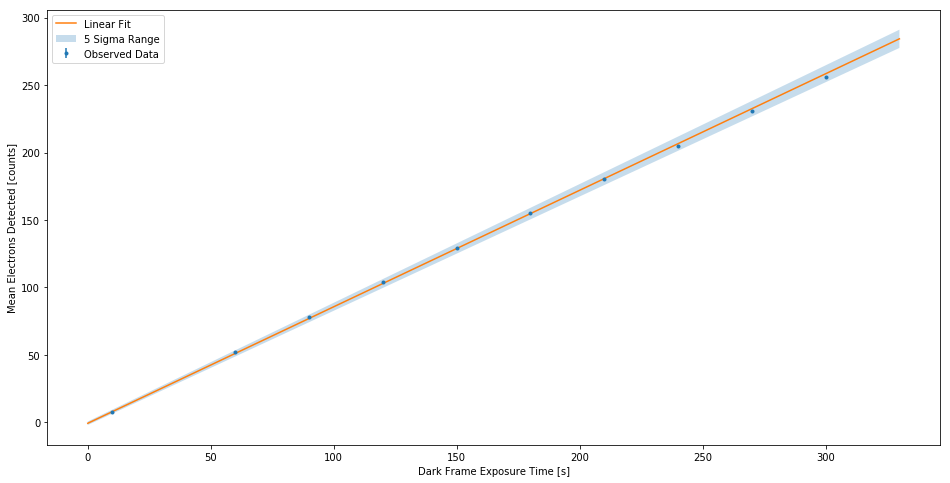

In [10]:
# Linear regression with y-axis errors
def line(x, a, b):
    return a*x+b

# Get optimal ab params and covar matrix, make it a function
popt, pcov = curve_fit(line, exp_times, means, sigma=sig_on_mean)
fit_err = np.sqrt(np.diag(pcov))
dark_current_function = np.poly1d(popt)
dark_current_lo = np.poly1d(popt - 5*fit_err)
dark_current_hi = np.poly1d(popt + 5*fit_err)

# Make the scatter plot with error bars
time = np.linspace(0, 330, 330)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)
ax1.errorbar(exp_times, means, yerr=sig_on_mean, linestyle='none', marker='.', label='Observed Data')
ax1.set_xlabel('Dark Frame Exposure Time [s]')
ax1.set_ylabel('Mean Electrons Detected [counts]')
ax1.plot(time, dark_current_function(time), label='Linear Fit')
ax1.fill_between(time, dark_current_lo(time), dark_current_hi(time), alpha=0.25, label='5 Sigma Range')

print('Dark Current = {0:4.4f} +/- {1:4.4f} e/pix/s'.format(popt[0], fit_err[0]))
print('Intercept = {0:4.4f} +/- {1:4.4f}. Should be 0 if perfect Camera.'.format(popt[1], fit_err[1]))

ax1.legend()
plt.show()

Dark Current = 3.5207 +/-  inf e/pix/s
Intercept = -0.0000 +/-  inf. Should be 0 if perfect Camera.


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


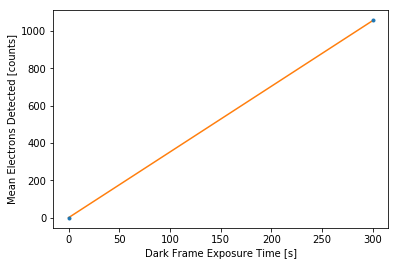

In [39]:
# Open files
bias_10c = fits.open('../data/bias_1series_10c_0s.00000001.BIAS.FIT')
dark_10c = fits.open('../data/dark_1series_10c_5m.00000001.DARK.FIT')

# Subtract bias
dark_corrected_10c = dark_10c[0].data - bias_10c[0].data

# Find mean and stddev
mu = np.mean(dark_corrected_10c.flatten())
sig = np.std(dark_corrected_10c.flatten())

# define domain and gaussian using stats
domain = np.linspace(-500,10000, 1000)
gaussian = np.exp(-1*pow((domain - mu)/sig, 2)/2)/pow(2*sig*sig*np.pi, 0.5)

# Plot to get dark current at 10c
err_on_mean = sig/np.sqrt(len(dark_corrected_10c.flatten()))
fig, ax = plt.subplots(1, 1)
ax.errorbar([0, dark_10c[0].header['EXPTIME']], [0, mu], yerr=err_on_mean, linestyle='none', marker='.')

# Fit again
popt, pcov = curve_fit(line, [0, dark_10c[0].header['EXPTIME']], [0, mu], sigma=[err_on_mean, err_on_mean])
fit_err = np.sqrt(np.diag(pcov))
dark_current_10c_function = np.poly1d(popt)
dark_current_10c_lo = np.poly1d(popt - 3*fit_err)
dark_current_10c_hi = np.poly1d(popt + 3*fit_err)

# Plot fit line
ax.plot([0, dark_10c[0].header['EXPTIME']], dark_current_10c_function([0, dark_10c[0].header['EXPTIME']]))
ax.set_xlabel('Dark Frame Exposure Time [s]')
ax.set_ylabel('Mean Electrons Detected [counts]')

print('Dark Current = {0:4.4f} +/- {1:4.4f} e/pix/s'.format(popt[0], fit_err[0]))
print('Intercept = {0:4.4f} +/- {1:4.4f}. Should be 0 if perfect Camera.'.format(popt[1], fit_err[1]))

# Close files
bias_10c.close()
dark_10c.close()

## 4.3: Imaging Flat Fields

For the flat fields, once again a histogram of the number of counts was created. In order to quantify the vignetting effects of the CCD as you move outwards from the center (vignetting being the systematic dimming of the field due to the strucutre of the CCD), a plot was created of the relative brightness of pixels as a function of the distance to the center, in a type of bullseye pattern. 

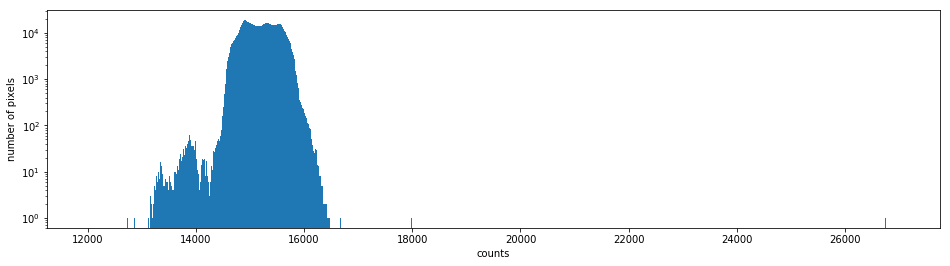

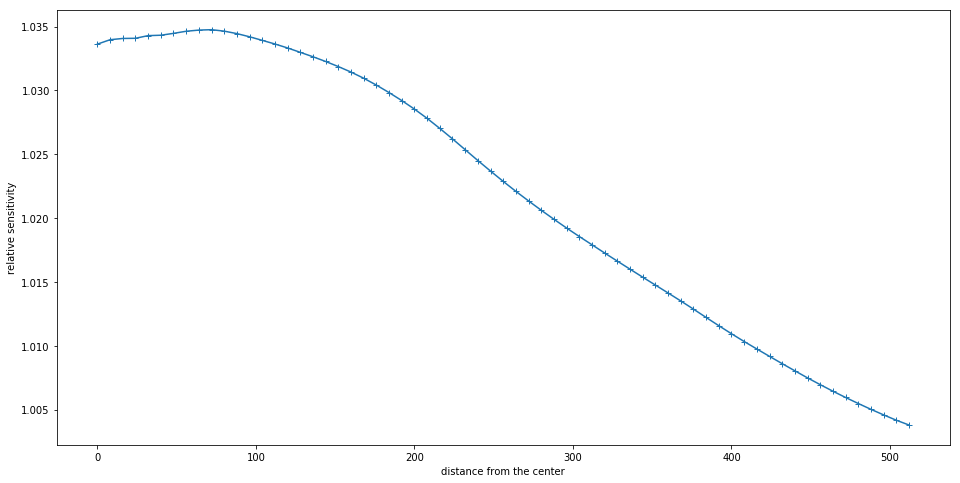

In [12]:
#initialize lists
filename=['../data/flat.00000007.FLAT.FIT',
'../data/flat.00000008.FLAT.FIT',
'../data/flat.00000009.FLAT.FIT',
'../data/flat.00000010.FLAT.FIT',
'../data/flat.00000011.FLAT.FIT',
'../data/flat.00000012.FLAT.FIT',
'../data/flat.00000013.FLAT.FIT',
'../data/flat.00000014.FLAT.FIT',
'../data/flat.00000015.FLAT.FIT',
'../data/flat.00000016.FLAT.FIT']
flatimage=[None]*10
imagedata=[None]*10

#read .fits files
for i in range(10):
    flatimage[i]=fits.open(filename[i])
    imagedata[i]=flatimage[i][0].data
        
#take average of 10 flat-fields
avgcounts=np.mean(imagedata,axis=0)
avg=fits.PrimaryHDU(avgcounts)
#avg.writeto('../data/avgcounts_flatfields.fits')
#normalize to typical counts level(mean), take relative sensitivity(ratio) of each pixel
avgcounts1=avgcounts.ravel()    # make 2d to 1d
mean=np.mean(avgcounts1)
std=np.std(avgcounts1)
ratio=avgcounts/mean

#plot histo of the counts for master flat-field
plt.figure()
plt.figure(figsize=(16,4))
plt.hist(avgcounts1,1000,range=[12000,27000])
#plt.hist(avgcounts1, 1000, density=True)#, range=[12000, 27000])
plt.xlabel('counts')
plt.ylabel('number of pixels')
plt.yscale('log')
#plt.ylim(3e-8, 3e-2)
plt.show()


#plot relative sensitivity vs distance from the center
x=np.array(range(-512,513))
y=np.array(range(-512,513))
xc,yc=np.meshgrid(x,y)
xc=np.delete(xc,512,axis=0)
xc=np.delete(xc,512,axis=1)
yc=np.delete(yc,512,axis=0)
yc=np.delete(yc,512,axis=1) #get rid of 0 row/column

d=(xc**2+yc**2)**0.5 #distance from the center
r=np.array([i for i in range(0,520,8)]) #radius from 0,8,16...512
avgcounts[np.where((avgcounts >= mean+3*std) | (avgcounts <= mean-3*std))]=np.NaN
avgcounts_r=np.array([None]*65)
ratio_r=np.array([None]*65)
for i in range(65):
    avgcounts_r[i]=np.nanmean(avgcounts[np.where((d<8*(i+1) | (d>i)))])
    ratio_r[i]=np.nanmean(ratio[np.where((d<8*(i+1) | (d>i)))])
plt.figure(figsize=(16,8))
#plt.plot(r,avgcounts_r,'+-')
plt.plot(r,ratio_r,'+-')
plt.xlabel('distance from the center')
plt.ylabel('relative sensitivity')
plt.show()


## 4.4: Bad Pixel Map

Finally, using the clipping value from the dark current statistics and the flat field statistics, a map of both the "hot" (outside the dark current clipping range) and "dead" (outside the clipping range of the flat fields) pixels was created. This creates a mask that we can apply to future images to automatically ignore locations of the CCD that contain dysfuncitonal pixels to avoid data contamination. 

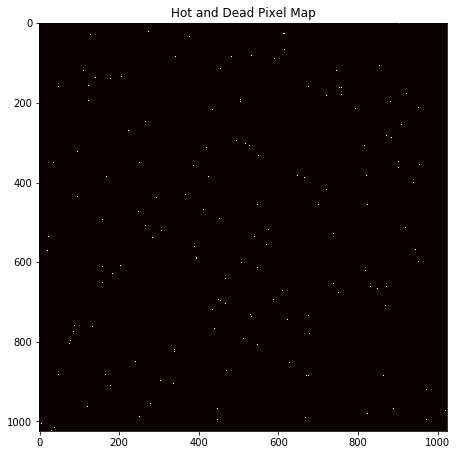

In [13]:
hot_map = np.empty(shape=master_dark.shape)
dead_map = np.empty(shape=master_dark.shape)
total_map = np.empty(shape=master_dark.shape)

# Make hot map
for i in range(len(master_dark)):
    for j in range(len(master_dark)):
        if master_dark[i][j] > rightcutoff:
            hot_map[i][j] = 1
        else:
            hot_map[i][j] = 0            

# Make dead map
for i in range(len(master_dark)):
    for j in range(len(master_dark)):
        if avg.data[i][j] < mean-5*std or avg.data[i][j] > mean + 5*std:
            dead_map[i][j] = 1
        else:
            dead_map[i][j] = 0

# Make total map
for i in range(len(master_dark)):
    for j in range(len(master_dark)):
        if (hot_map[i][j] == 1) or (dead_map[i][j] == 1):
            total_map[i][j] = 1
        else:
            total_map[i][j] = 0
            
fig = plt.figure(figsize=(15, 7.5))
ax1 = fig.add_subplot(111)
ax1.set_title('Hot and Dead Pixel Map')
ax1.imshow(total_map, cmap='hot')
plt.show()

## 4.5: Spectroscopic Calibration

For the spectroscopy part of this lab, we needed to look at our spectroscopic flat and neon spectrum. 

The first thing noticed was a significant slant in the flat image that would have required us to remove a large amount of the data to get just pixels with actual values instead of background. To remedy this, we found a simple skew matrix transformation that would shift the y coordinate of the grid to plac pixels in line. Since the x direction was unchanged, his process conserved the total intensity at a given x coordinate, which directly coorelates with the frequency of the light observed.

In order to calibrate the data, a low order polynomial was fit to the distribution of the flat field. The low order variation represents an actual change in sensitivity due to the equipment operating at distinct wavelength values. The remaining variations are produced by the actual lught that is used for the flat image. 

In [14]:
#read spec flat image file
flatimage=fits.open('../data/spec_flat_field.FIT')
imagedata_fl=flatimage[0].data
imagedata_fl.shape

(510, 765)

In [15]:
#adjusted the shear
A=np.array(([1,0],[-10/765,1])) #tranformation matrix
rot_data=np.empty(shape=(510,765))
for y in range(510):
    for x in range(765):
        xp,yp=(A@[x,y])
        if xp>=0 and yp>=0:
            rot_data[ceil(yp)][int(xp)]=imagedata_fl[y][x]

In [16]:
rotated=fits.PrimaryHDU(rot_data)
#rotated.writeto('../data/rotated_spec_flat.FIT')

In [17]:
cut_rotfl=rot_data[75:206,:]
cut=fits.PrimaryHDU(cut_rotfl)
#cut.writeto('../data/cut_rotated_spec_flat.FIT')
cut_rotfl.shape

(131, 765)

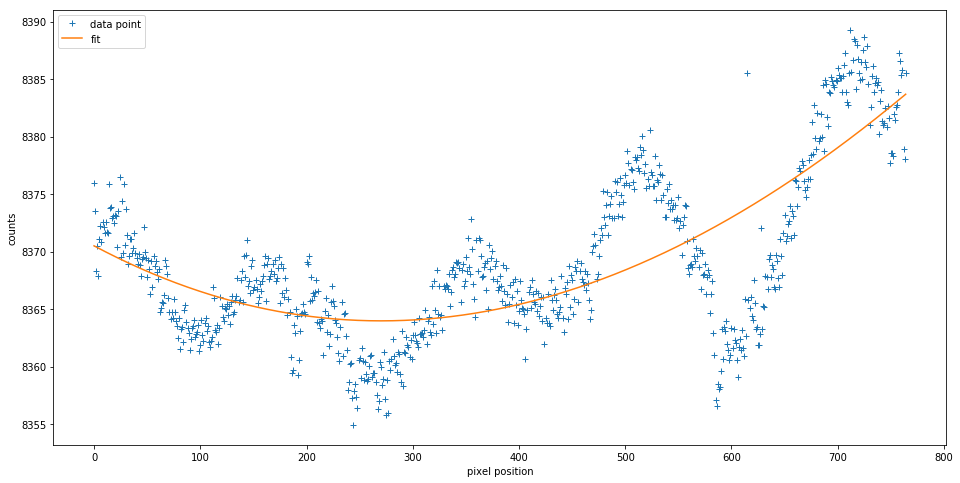

In [18]:
#fit averaged counts wrt wl.
%matplotlib inline
avgcounts_fl=np.mean(cut_rotfl,axis=0)
wl=np.array([i for i in range(765)])
plt.figure(figsize=(16,8))
plt.plot(wl,avgcounts_fl,'+',label='data point')
fit=np.poly1d(np.polyfit(wl,avgcounts_fl,3))
plt.plot(wl,fit(wl),label='fit')
plt.xlabel('pixel position')
plt.ylabel('counts')
plt.legend()
plt.show()

(765,)


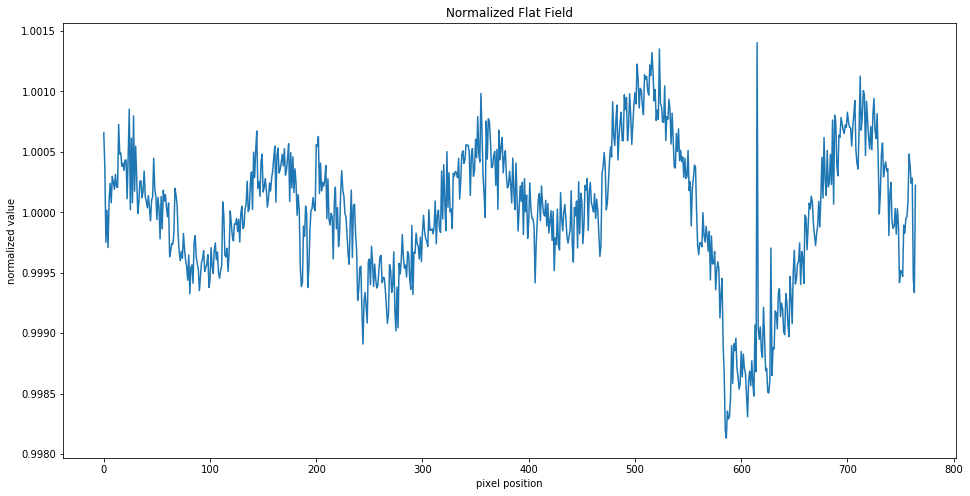

In [19]:
#normalizing flat field
norm_fl=avgcounts_fl/fit(wl)
norm_fl.shape
plt.figure(figsize=(16,8))
plt.plot(wl,norm_fl)
plt.xlabel('pixel position')
plt.ylabel('normalized value')
plt.title('Normalized Flat Field')
print(norm_fl.shape)

In [20]:
spec_lampdat,hdr11=fits.getdata('../data/spec_lamp.FIT',0,header=True)
cut_spec_lamp=spec_lampdat[90:221,:]
#fits.writeto('../data/50micro_spec_lamp.fits',cut_spec_lamp,hdr11)
print(cut_spec_lamp.shape)

(131, 765)


Now that the normalized flat fit exists, we can use it to normalize our other data! The neon spectrum image was divided by the normalized spectrum to get rid of the equipment variations in sensitivity by wavelength. The leaves us with a frame that we can then plot the average intesity in each column by the x pixel coordinate, to create a mock of a neon spectrum. A set of calibration points, the known wavelengths at which neon emits at, were plotted against the x coordinate to determine the proper scaling. The final spectra was compared with a known neon spectra to see how they match.

Wavelength per pixel (angstroms/pixel)  0.974843407033


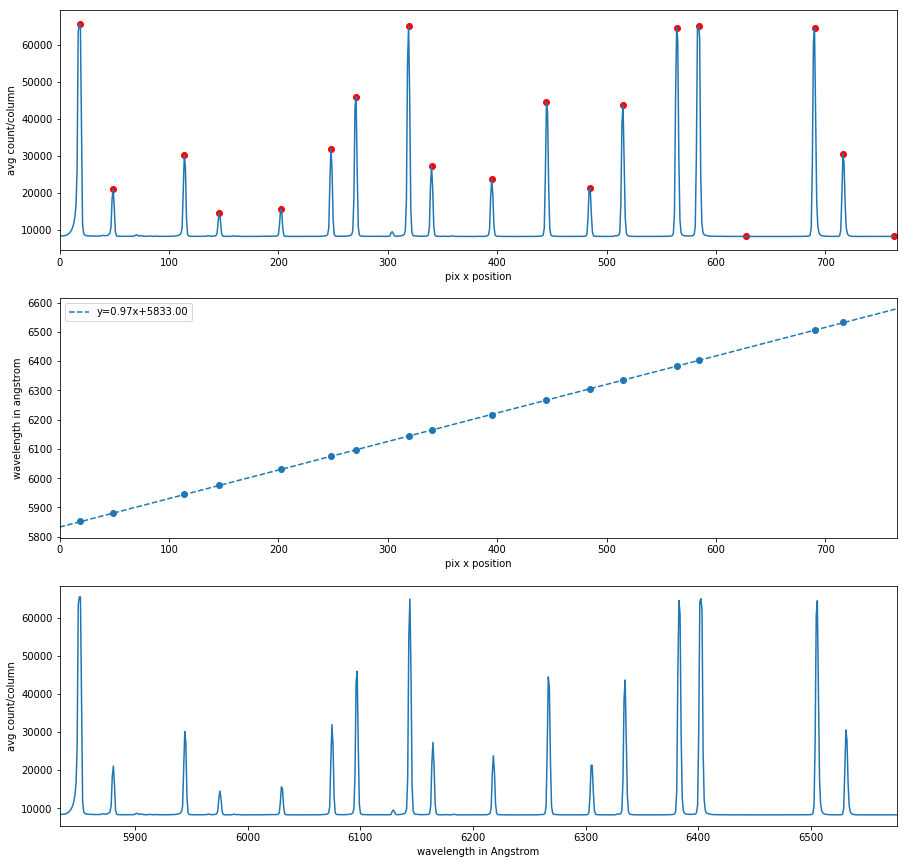

In [41]:
# Dividing spec lamp by normalized flats
calibrated_spec=cut_spec_lamp/norm_fl

#fits.writeto('../data/calibrated_spec.fits',calibrated_spec)

#print('indices for pixels with counts>8300', np.where(calibrated_spec>8700))
avg_col=np.mean(calibrated_spec,axis=0)
x_pos=np.array([i for i in range(765)])
index_peak=argrelextrema(avg_col,np.greater,order=19)

wavelen=[5852.49, 5881.89, 5944.83, 5975.53, 6030.00, 6074.34, 6096.16, 6143.06, 6163.59, 6217.28, 6266.49, 6304.79, 6334.43, 6382.99, 6402.25, 6506.53, 6532.88]
x_co=[19,49,114,146,202,248,271,319,340,395,445,485,515,564,584,690,716]
fit=np.polyfit(x_co,wavelen,1)
print('Wavelength per pixel (angstroms/pixel) ', fit[0])
Lnreg=np.poly1d(fit)
expected_wavelen=Lnreg(x_pos)

fig = plt.figure(figsize=(15, 15))
ax_a = fig.add_subplot(311)
ax_b = fig.add_subplot(312)
ax_c = fig.add_subplot(313)

ax_a.plot(x_pos,avg_col)
ax_a.set_xlabel('pix x position')
ax_a.set_ylabel('avg count/column')
ax_a.set_xlim(0,765)
ax_a.scatter(index_peak[0],avg_col[index_peak[0]],c='r')

ax_b.scatter(x_co,wavelen)
ax_b.plot(x_pos,expected_wavelen,linestyle='--',label='y=0.97x+5833.00')
ax_b.set_xlabel('pix x position')
ax_b.set_ylabel('wavelength in angstrom')
ax_b.set_xlim(0,765)
ax_b.legend()

ax_c.plot(expected_wavelen,avg_col)
#ax_c.scatter(expected_wavelen,avg_col[index_peak[0]],c='r')
ax_c.set_xlim(5833,6576)
ax_c.set_xlabel('wavelength in Angstrom')
ax_c.set_ylabel('avg count/column')
plt.show()

## 4.6: Calibration

In this report we used a few different calibration strategies that will be useful in later labs. In order to account for quantum mechanical effects, the master dark is subtracted from our science data. In order to control the systematic effects like vignetting and dust on the lens, we divide by the master flat, which normalized the data. 